<a href="https://colab.research.google.com/github/Devphadatare/-Medical-Insurance-Cost-Prediction-using-Machine-Learning/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Insurance Cost Prediction

#Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px

#Load and Explore Data

In [38]:
# Load the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

# Display the first 5 rows of the dataframe
print(insurance_dataset.head())

# Print the number of rows and columns
print(insurance_dataset.shape)

# Get information about the dataset
print(insurance_dataset.info())

# Check for missing values
print(insurance_dataset.isnull().sum())

# Display statistical measures of the dataset
print(insurance_dataset.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region     

#Data Visualization

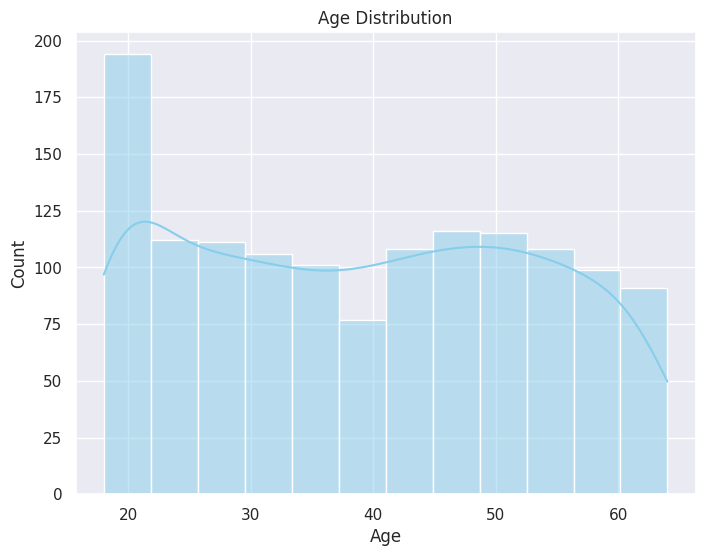

<ipython-input-39-f5ea50d3eb2b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




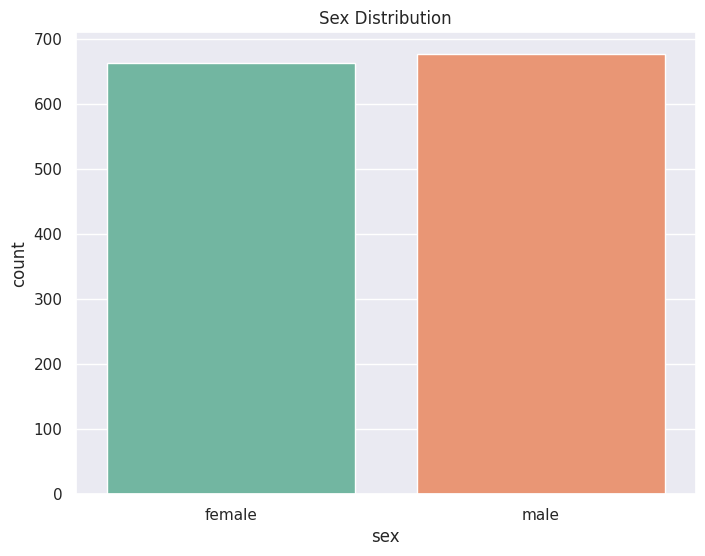

sex
male      676
female    662
Name: count, dtype: int64


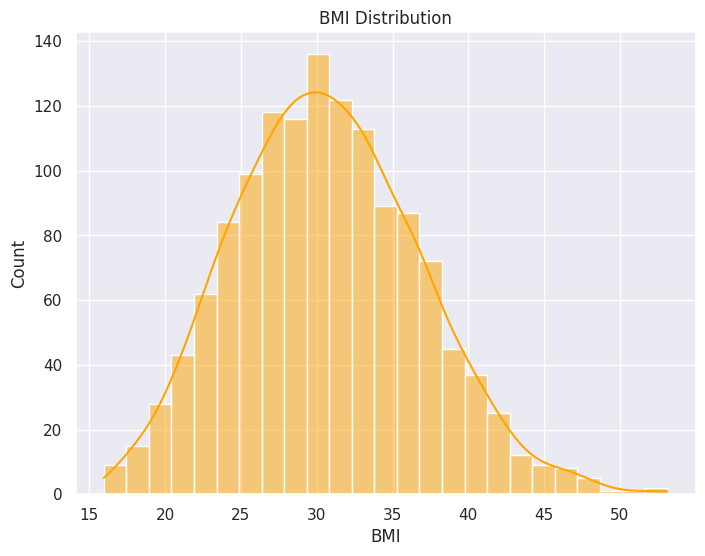

<ipython-input-39-f5ea50d3eb2b>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




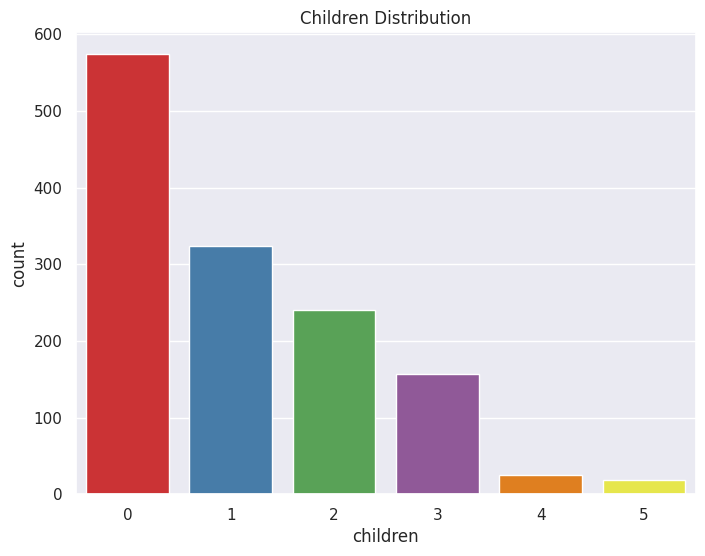

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


<ipython-input-39-f5ea50d3eb2b>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




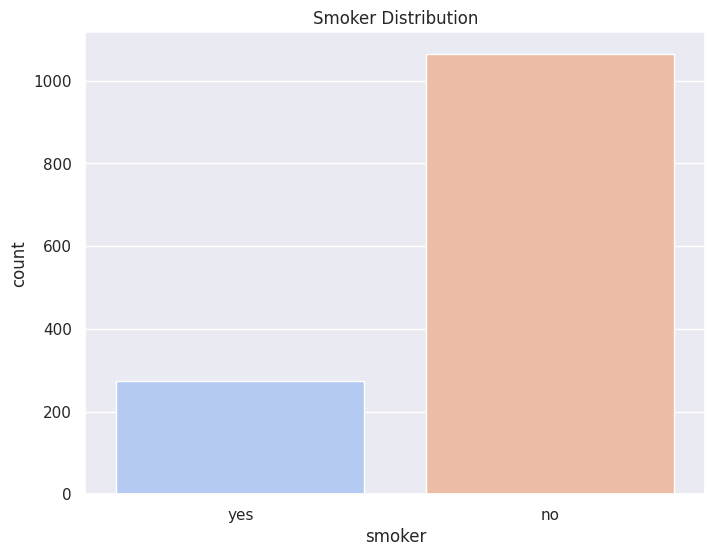

smoker
no     1064
yes     274
Name: count, dtype: int64


<ipython-input-39-f5ea50d3eb2b>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




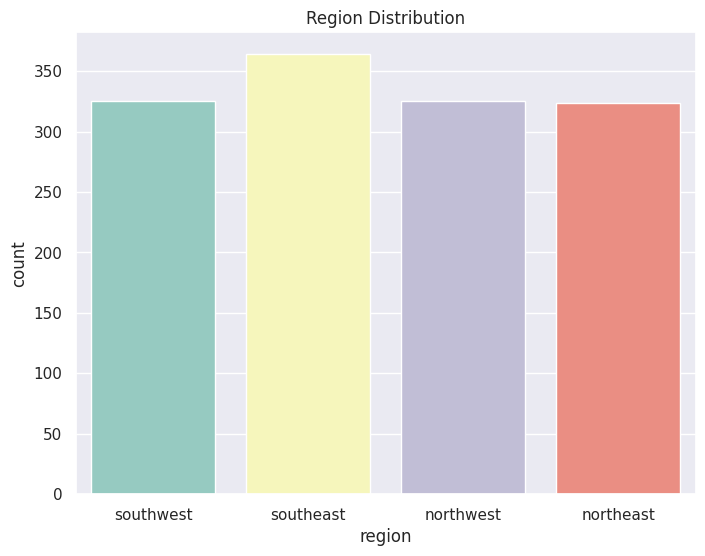

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


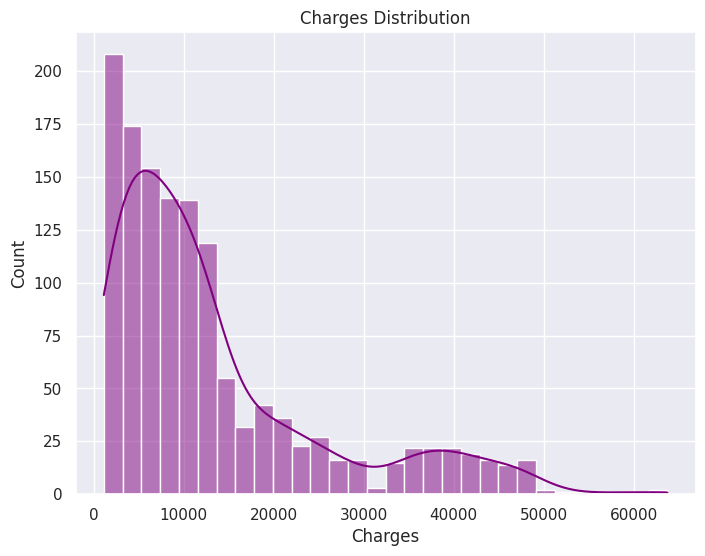

In [39]:
# Distribution of age value
plt.figure(figsize=(8, 6))
sns.histplot(insurance_dataset['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=insurance_dataset, palette='Set2')
plt.title('Sex Distribution')
plt.show()
print(insurance_dataset['sex'].value_counts())

# BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(insurance_dataset['bmi'], kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Children distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=insurance_dataset, palette='Set1')
plt.title('Children Distribution')
plt.show()
print(insurance_dataset['children'].value_counts())

# Smoker distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=insurance_dataset, palette='coolwarm')
plt.title('Smoker Distribution')
plt.show()
print(insurance_dataset['smoker'].value_counts())

# Region distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=insurance_dataset, palette='Set3')
plt.title('Region Distribution')
plt.show()
print(insurance_dataset['region'].value_counts())

# Distribution of charges value
plt.figure(figsize=(8, 6))
sns.histplot(insurance_dataset['charges'], kde=True, color='purple')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


#Data Preprocessing

In [40]:
# Encoding categorical columns
print(insurance_dataset['sex'].unique())
print(insurance_dataset['smoker'].unique())
print(insurance_dataset['region'].unique())

insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


#Correction Analysis

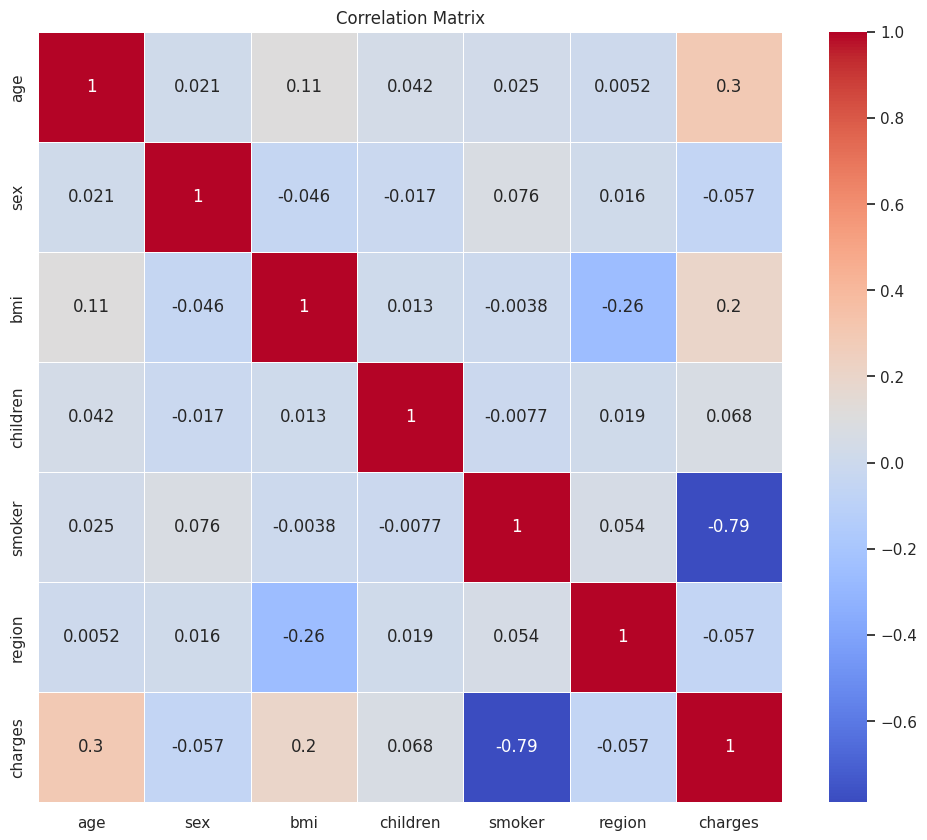

In [41]:
# Compute the correlation matrix
correlation_matrix = insurance_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Additional Analysis

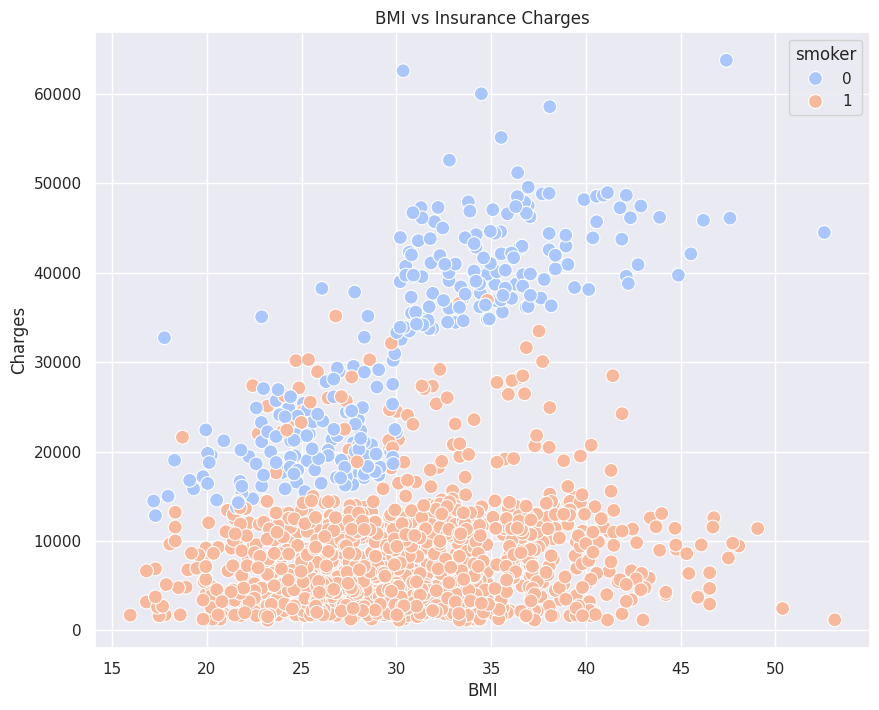

In [52]:
# Insurance Charges by Age Group
insurance_dataset['age_group'] = pd.cut(insurance_dataset['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60-70'])
age_group_charges = insurance_dataset.groupby('age_group')['charges'].mean().reset_index()
fig = px.bar(age_group_charges, x='age_group', y='charges', title='Average Insurance Charges by Age Group', color='charges', color_continuous_scale='Viridis')
fig.show()

# BMI and Charges Relationship
plt.figure(figsize=(10, 8))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_dataset, palette='coolwarm', s=100)
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Smoker vs Non-Smoker Charges
smoker_charges = insurance_dataset.groupby('smoker')['charges'].mean().reset_index()
fig = px.bar(smoker_charges, x='smoker', y='charges', title='Average Insurance Charges: Smokers vs Non-Smokers', color='charges', color_continuous_scale='Portland')
fig.show()


Model Building and Evaluation

In [43]:
# Split features and target
X = insurance_dataset.drop(columns=['charges', 'age_group'], axis=1)
Y = insurance_dataset['charges']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Load and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predictions on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value (training): ', r2_train)

# Predictions on test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value (test): ', r2_test)

# Additional evaluation metrics
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)


R squared value (training):  0.751505643411174
R squared value (test):  0.7447273869684076
Mean Absolute Error:  4267.213826730733
Root Mean Squared Error:  6191.690842285236


#Feature Importance

In [44]:
# Calculate feature importance
feature_importance = abs(regressor.coef_)
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importance', color='Importance', color_continuous_scale='Bluered')
fig.show()


#Predictions and Insights

In [45]:
# Example prediction
input_data = (31, 1, 25.74, 0, 1, 0)  # age, sex, bmi, children, smoker, region
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = regressor.predict(input_data_reshaped)
print('The insurance cost is USD $', prediction[0])

# Checking eligibility
def check_eligibility(age, bmi, smoker):
    if age > 18 and bmi < 30 and not smoker:
        return "Eligible for insurance"
    else:
        return "Not eligible for insurance"

age = 31
bmi = 25.74
smoker = 0
eligibility_status = check_eligibility(age, bmi, smoker)
print(f'Eligibility status for insurance: {eligibility_status}')


The insurance cost is USD $ 3760.080576496057
Eligibility status for insurance: Eligible for insurance


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Additional Visualizations and Analysis

<ipython-input-46-b7a81f20e06f>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




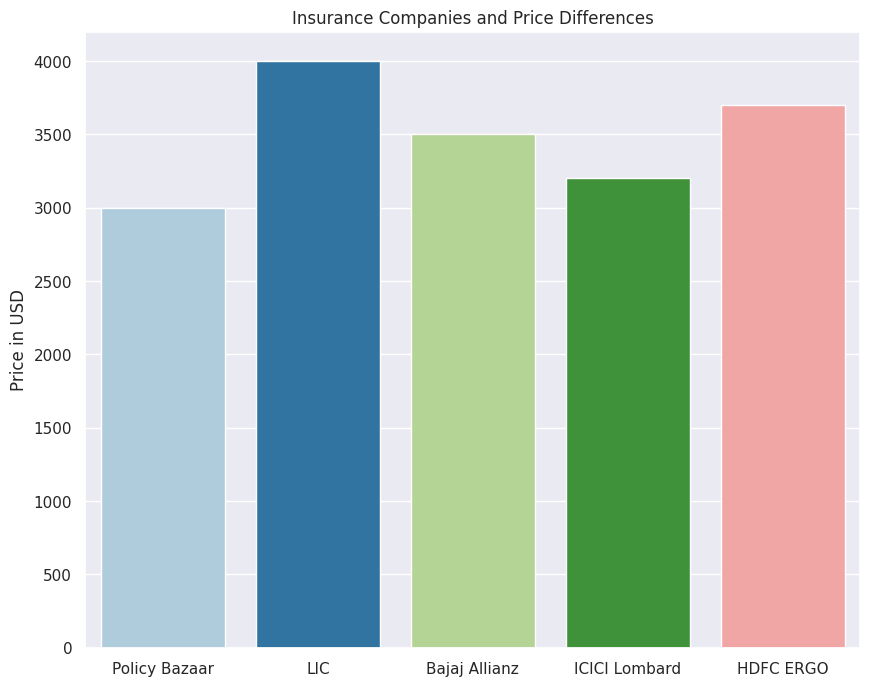

In [46]:
# Insurance companies and price differences
insurance_companies = {
    "Policy Bazaar": 3000,
    "LIC": 4000,
    "Bajaj Allianz": 3500,
    "ICICI Lombard": 3200,
    "HDFC ERGO": 3700
}

plt.figure(figsize=(10, 8))
companies = list(insurance_companies.keys())
prices = list(insurance_companies.values())
sns.barplot(x=companies, y=prices, palette='Paired')
plt.title('Insurance Companies and Price Differences')
plt.ylabel('Price in USD')
plt.show()

# EMI options for insurance
emi_data = {
    "Company": ["Policy Bazaar", "LIC", "Bajaj Allianz", "ICICI Lombard", "HDFC ERGO"],
    "Price (USD)": [3000, 4000, 3500, 3200, 3700],
    "EMI 6 Months (USD)": [510, 680, 595, 544, 629],
    "EMI 12 Months (USD)": [265, 355, 310, 284, 329]
}

emi_df = pd.DataFrame(emi_data)
fig = px.bar(emi_df, x='Company', y=['EMI 6 Months (USD)', 'EMI 12 Months (USD)'], barmode='group', title='EMI Options for Insurance')
fig.show()

# Alert for those who don't have insurance
insurance_dataset['has_insurance'] = insurance_dataset['charges'] > 0
no_insurance_count = insurance_dataset['has_insurance'].value_counts().get(False, 0)
if no_insurance_count > 0:
    print(f"Alert: There are {no_insurance_count} individuals without insurance. Consider getting insured for financial security.")

# Comparison of medical bills with and without insurance
medical_bills = {
    "Medical Condition": ["Condition A", "Condition B", "Condition C", "Condition D"],
    "Without Insurance (USD)": [10000, 15000, 20000, 25000],
    "With Insurance (USD)": [2000, 3000, 4000, 5000]
}

medical_bills_df = pd.DataFrame(medical_bills)
fig = px.bar(medical_bills_df, x='Medical Condition', y=['Without Insurance (USD)', 'With Insurance (USD)'], barmode='group', title='Medical Bills: With vs Without Insurance')
fig.show()


#Summary and Saving the Enhanced Data

In [47]:
# Summary of the analysis
print("\nSummary of the Analysis:")
print("- Visualized various distributions and relationships in the insurance data.")
print("- Performed correlation analysis to identify important features.")
print("- Built a linear regression model to predict insurance charges.")
print("- Provided insights into insurance eligibility, company prices, EMI options, and benefits of insurance.")
print("- Compared medical bills with and without insurance.")

# Save the enhanced dataset
insurance_dataset.to_csv('enhanced_insurance_dataset.csv', index=False)
print("Enhanced dataset saved as 'enhanced_insurance_dataset.csv'.")



Summary of the Analysis:
- Visualized various distributions and relationships in the insurance data.
- Performed correlation analysis to identify important features.
- Built a linear regression model to predict insurance charges.
- Provided insights into insurance eligibility, company prices, EMI options, and benefits of insurance.
- Compared medical bills with and without insurance.
Enhanced dataset saved as 'enhanced_insurance_dataset.csv'.
